# Statistics 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
df.head()

,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
df.shape

(306, 4)

We see that our dataset consists of 4 columns and 306 rows each.

In [ ]:
df.columns

Index(['age', 'operation_Year', 'axil_nodes', 'survival_status'], dtype='object')

In [ ]:
df['survival_status'].unique()

array([1, 2])

 The columns are:
 
 age : Age of the patient (numerical)
 
 operation_year : Year of operation ( numerical)
 
 axil_nodes : Number of positive axiliary nodes (numerical)
 
 survival_status (binary) : 1 if patient survived 5 or more years, 2 if the  patient died within 5 years


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int64
 1   operation_Year   306 non-null    int64
 2   axil_nodes       306 non-null    int64
 3   survival_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


 We see that there are no null values present in our dataset and all columns 
 are of integer data type. Further, the survival_status could be converted to a categorical data type.

In [ ]:
df["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

On first glance through the dataset, we observe that about 73 percet of the 306 patients have survived for 5 or more than 5 years.

A class imbalance is present here.

In [ ]:
df['survival_status_after_5_years'] = df['survival_status'].map({1:"Yes", 2:"No"})
df.pop("survival_status")
df.head()

,age,operation_Year,axil_nodes,survival_status_after_5_years
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [ ]:
df.describe()

,age,operation_Year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Median Absolute Deviations:

In [ ]:
from statsmodels import robust
print(robust.mad(df['age']))
print(robust.mad(df['axil_nodes']))
print(robust.mad(df['operation_Year']))

11.860817748044816
1.482602218505602
4.447806655516806


Observations:

(i) The mean age of patients is 52 and ranges between 30 to 83.

(ii) The traget variable ie. "suvival_status_after_5_years" is highly imbalanced with 73 percent of the observations being positive.

(iii) Even though the maximum number of axilliary nodes is 52 in our dataset, 75 percentile of the observations have only 4 or less nodes.  

# Objective

To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive axillary lymph nodes
present.


# Univariate Analysis

PDFs and CDFs

In [ ]:
def pdf_and_cdf(x):
    counts, bin_edges = np.histogram( df[x], bins = 10, density = True )
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf)
    plt.plot(bin_edges[1:], cdf)
    plt.xlabel(x)
    
    plt.show()

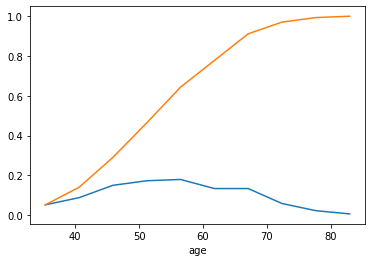

In [ ]:
pdf_and_cdf("age")

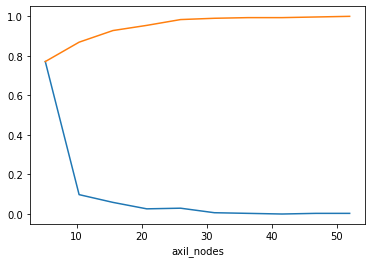

In [ ]:
pdf_and_cdf('axil_nodes')

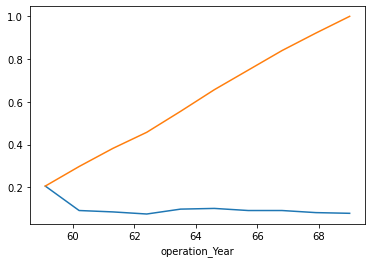

In [ ]:
pdf_and_cdf('operation_Year')

Boxplot

In [ ]:
def boxy(i):
    sns.boxplot(x = df['survival_status_after_5_years'], y = df[i])

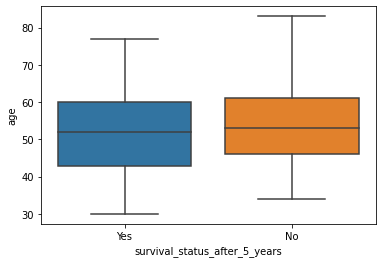

In [ ]:
boxy('age')

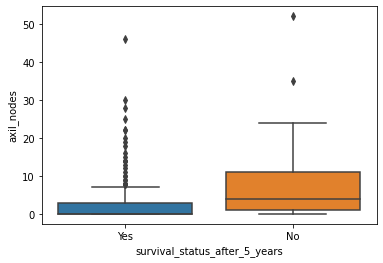

In [ ]:
boxy('axil_nodes')

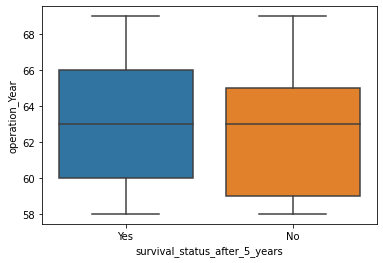

In [ ]:
boxy('operation_Year')

Violinplots

In [ ]:
def violin(i):
    sns.violinplot(y = i, x = 'survival_status_after_5_years', data = df, vert = True, palette = 'coolwarm', split = True, inner = 'quartiles')

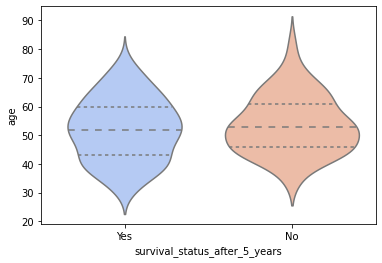

In [ ]:
violin('age')

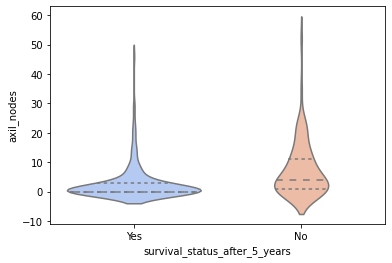

In [ ]:
violin('axil_nodes')

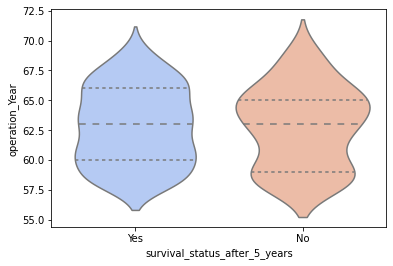

In [ ]:
violin('operation_Year')

Distribution plots

In [ ]:
def dist(x):
    sns.set_style("whitegrid")
    sns.FacetGrid(df, hue = "survival_status_after_5_years", size = 5).map(sns.distplot, x).add_legend()
    plt.show()

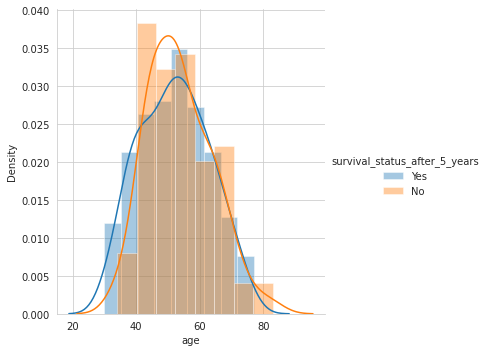

In [ ]:
dist('age')

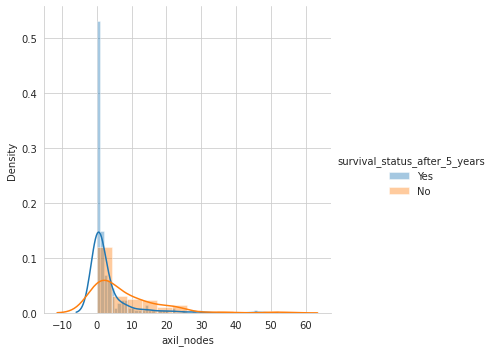

In [ ]:
dist('axil_nodes')

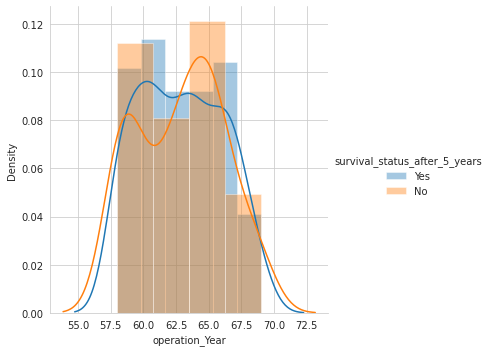

In [ ]:
dist('operation_Year')

# Bi-variate Analysis


Pair Plots

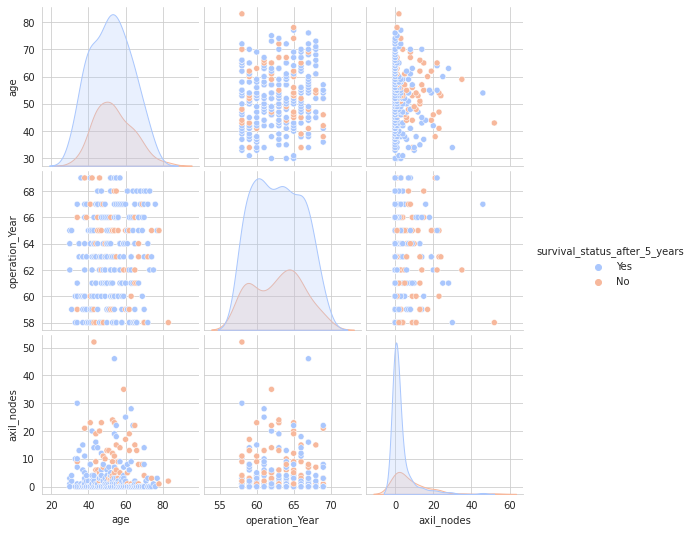

In [ ]:
sns.pairplot(df, hue = 'survival_status_after_5_years', palette= 'coolwarm')

In [ ]:
df_norm = abs(df - df.mean())/df.std()
df_norm["Survival_Status"] = df["survival_status_after_5_years"]

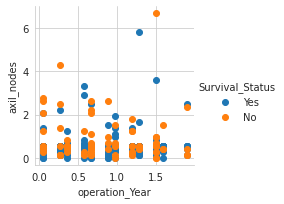

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df_norm, hue = "Survival_Status").map(plt.scatter, "operation_Year", "axil_nodes").add_legend()
plt.show()

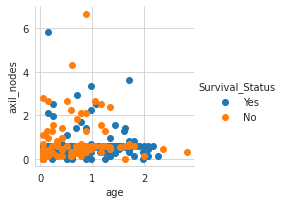

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df_norm, hue = "Survival_Status").map(plt.scatter, "age", "axil_nodes").add_legend()
plt.show()

Even after normalising, we see nothing conclusive for the relationship between the features or some sort os seperable plane.

# Multivarirate Analysis



3D Scatter Plot

In [ ]:
import plotly.express as px
fig = px.scatter_3d(df, x = "age", z ="axil_nodes", y = 'operation_Year', color = 'survival_status_after_5_years')
fig.show()

Contour Plot

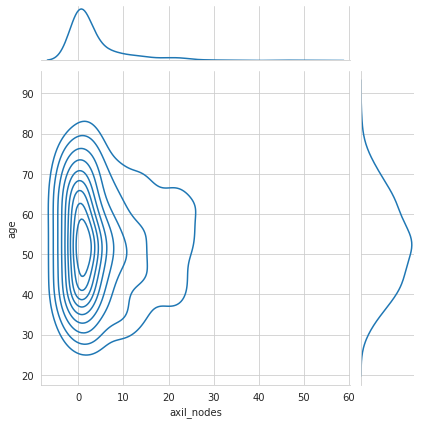

In [ ]:
sns.jointplot(x = 'axil_nodes', y = 'age', data = df, kind = "kde")
plt.show()

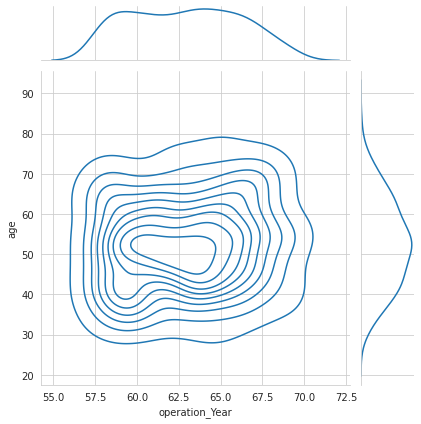

In [ ]:
sns.jointplot(x = 'operation_Year', y = 'age', data = df, kind = "kde")
plt.show()

Obseravtions :

(i) Patients with age (40 - 65) and (0 - 5) positive axiliary nodes have survived for 5 years or longer.

# Conclusion 

<h1>Observations from PDFs and CDFs:

(i) We observe that there is a higher success rate for the age bracket (40 - 60).

(ii) Higher survival rate is observed for people with lesser nodes. Patients with greater than 30 nodes have very very low survival rates.

(iii) For the case of operation year, the cdf is almost a straight line, so on differentiating it we should be getting a somewhat constant line, which is the pdf.

(iv) About 80 percent of patients having less than 5 nodes have survived.

<h1>Observations from box plots:

(i) Patients with lesser age tend to survive more than 5 years with outliers ranging from 30 to 77.

(ii) As seen in pdf, having lesser number of axilliary nodes provide higher chances of survival though there are plenty outliers in this case.

(iii) We observe that there's higher chances of survival for patients who got operated after 1960 and less likely for the ones who got operated before 1960.

<h1>Observations from violin plots:

(i) We cannot deem age as a defining parameter as patients from the same age brackets have survived as well as died. 

(ii) Patients with more axilliary nodes are less likely to survive.

(iii) There's positive as well as negative cases for patients with zero axilliary nodes. So we cannot deem it as a guarantee for survival status.

(iv) Many patients died in 1963 - 1965.



<h1>Observations from pair plots and scatter plots:

(i) We can conclude from the pairplots that they are not quite linearly separable although we see better separtion between the two classes in ( axil_nodes vs operation_Year) scatter plot than the other said scatter plots.

(ii) Even though there's no sort of proper separation to be seen, we could have a clearer picture after scaling and nnormalizing the dataset.

<h1>Observations from distribution plots: 

(i) In the age distribution plot, there's a high overlap between the two sets, hence we can say that age is not a deciding factor for survival chances.

(ii) Patients in age bracket (30 - 40) have higher chances of survival whereas patients in age bracket (40 - 60) have lesser chances and patients of age 65+ have somewhat equal chances of survival.

(iii) In the axil nodes plot, we see that patients with 0 or 1 node are more likely to survive meanwhile patients with 25 (say) nodes have lesser chances of survival.

(iv) In the operation year distribution plot, we see a high overlap between the two sets, so there have been succesful as well as unsuccesful operations. Specifically, there have been more unsuccesful operations in the year 1960 and 1965.

(i) The pair plot suggests that patient age and positive lymph nodes are significant to determine the patient's suurvival status.

(ii) The dataset is quite imbalanced.

(iii) 75 percent of patients have atmost 4 axil nodes.

(iv) Patients without more positive axiliary nodes tend to survive more whereas patients with more positive axiliary nodes tend to die relatively more.